In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
image = cv2.medianBlur(image,15)


In [ ]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)  #to RGB
gray_img=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)  #to grayscale

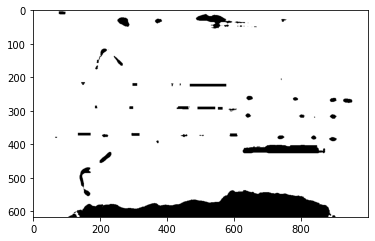

In [ ]:
# create a binary thresholded image
_, binary = cv2.threshold(gray_img, 225, 255, cv2.THRESH_BINARY_INV)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

In [ ]:
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

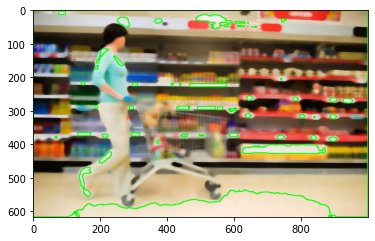

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
import imutils

In [ ]:
cnts = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:
print(len(cnts))

65


In [ ]:
import cv2
class ShapeDetector:
	def __init__(self):
		pass
	def detect(self, c):
		# initialize the shape name and approximate the contour
		shape = "unidentified"
		peri = cv2.arcLength(c, True)
		approx = cv2.approxPolyDP(c, 0.04 * peri, True)

In [ ]:
def shape_dec(approx):		
    # if the shape is a triangle, it will have 3 vertices
		if len(approx) == 3:
			shape = "triangle"
		# if the shape has 4 vertices, it is either a square or
		# a rectangle
		elif len(approx) == 4:
			# compute the bounding box of the contour and use the
			# bounding box to compute the aspect ratio
			(x, y, w, h) = cv2.boundingRect(approx)
			ar = w / float(h)
			# a square will have an aspect ratio that is approximately
			# equal to one, otherwise, the shape is a rectangle
			shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
		# if the shape is a pentagon, it will have 5 vertices
		elif len(approx) == 5:
			shape = "pentagon"
		# otherwise, we assume the shape is a circle
		else:
			shape = "circle"
		# return the name of the shape
		return shape

In [ ]:
import argparse
import imutils
import cv2
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to the input image")
ap.add_argument('-f')
args = vars(ap.parse_args())

In [ ]:
#image = cv2.imread(args["image"])
resized = imutils.resize(image, width=300)
ratio = image.shape[0] / float(resized.shape[0])
# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()

In [ ]:
for c in cnts:
	# compute the center of the contour, then detect the name of the
	# shape using only the contour
	M = cv2.moments(c)
	cX = int((M["m10"] / M["m00"]) * ratio)
	cY = int((M["m01"] / M["m00"]) * ratio)
	shape = sd.detect(c)
	# multiply the contour (x, y)-coordinates by the resize ratio,
	# then draw the contours and the name of the shape on the image
	c = c.astype("float")
	c *= ratio
	c = c.astype("int")
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
		0.5, (255, 255, 255), 2)
	# show the output image
	#cv2.imshow("Image", image)
	#cv2.waitKey(0)

In [ ]:
import cv2
class ShapeDetector:
	def __init__(self):
		pass
	def detect(self, c):
		# initialize the shape name and approximate the contour
		shape = "unidentified"
		peri = cv2.arcLength(c, True)
		approx = cv2.approxPolyDP(c, 0.04 * peri, True)
    # if the shape is a triangle, it will have 3 vertices
		if len(approx) == 3:
			shape = "triangle"
		# if the shape has 4 vertices, it is either a square or
		# a rectangle
		elif len(approx) == 4:
			# compute the bounding box of the contour and use the
			# bounding box to compute the aspect ratio
			(x, y, w, h) = cv2.boundingRect(approx)
			ar = w / float(h)
			# a square will have an aspect ratio that is approximately
			# equal to one, otherwise, the shape is a rectangle
			shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
		# if the shape is a pentagon, it will have 5 vertices
		elif len(approx) == 5:
			shape = "pentagon"
		# otherwise, we assume the shape is a circle
		else:
			shape = "circle"
		# return the name of the shape
		return shape
    
    
import argparse
import imutils
import cv2
import numpy as np
# construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to the input image")
#ap.add_argument('-f')
#args = vars(ap.parse_args())

from google.colab import drive
drive.mount('/content/gdrive')
image = cv2.imread('/content/gdrive/My Drive/object_detection/IMG-20221104-WA0026.jpg')
resized = imutils.resize(image, width=300)
ratio = image.shape[0] / float(resized.shape[0])
# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
#thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
kernel = np.ones((30, 30), np.uint8)
closing = cv2.morphologyEx(blurred, cv2.MORPH_CLOSE, kernel)
canny = cv2.Canny(closing, 30, 150, 3)
dilated = cv2.dilate(canny, (1, 1), iterations=0)
# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()
for c in cnts:
	# compute the center of the contour, then detect the name of the
	# shape using only the contour
       M = cv2.moments(c)
       tr=0
       try:
            	cX = int((M["m10"] / M["m00"]) * ratio)
            	cY = int((M["m01"] / M["m00"]) * ratio)
            	shape = sd.detect(c)
            	# multiply the contour (x, y)-coordinates by the resize ratio,
            	# then draw the contours and the name of the shape on the image
            	c = c.astype("float")
            	c *= ratio
            	c = c.astype("int")
            	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
            	cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
            		0.5, (255, 255, 255), 2)
            	# show the output image
            	cv2.imshow("Image", image)
            	cv2.waitKey(0)
       except:
                print('floar divison errorr')
    

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr
floar divison errorr


In [ ]:
traiangle=0
circle=0
square=0
rectangle=0
pentagon=0
for c in cnts:
  M = cv2.moments(c)
  try:
    cX = int((M["m10"] / M["m00"]) * ratio)
    cY = int((M["m01"] / M["m00"]) * ratio)
    shape = sd.detect(c)
    if shape=='triangle':
      traiangle+=1
    elif shape=='circle':
      circle+=1
    elif shape=='square':
      square+=1
    elif shape=='rectangle':
      rectangle+=1
    elif shape=='pentagon':
      pentagon+=1
    c = c.astype("float")
    c *= ratio
    c = c.astype("int")
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
            		0.5, (255, 255, 255), 2)
    cv2.imshow("Image", image)
    cv2.waitKey(0)
  except:
    print('floor divison errorr')

floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr
floor divison errorr


In [ ]:
circle,traiangle,square,rectangle,pentagon

(13, 1, 1, 12, 2)

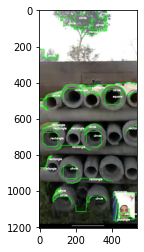

In [ ]:
import matplotlib.pyplot as plt
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(dilated.copy(), cnts, -1, (0, 255, 0), 2)
 
plt.imshow(rgb)